# WeRateDogs推特的狗狗的数据观察分析报告


## 提出的问题
- 不同地位的狗狗的数量分布
- 研究狗狗的评分分布
- 用户喜爱使用的设备
- 用户比较喜欢给狗狗的名称的前20个
- 用户转发和喜爱数和狗狗的地位以及评分之间的关系

## 分析和可视化

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned_twitter_archive_enhanced = pd.read_csv("cleaned_twitter_archive_enhanced.csv")
# 设置色板
color_board = ["#bbded6", "#ffb6b9", "#fae3d9", "#8ac6d1"]

### 可视化1：不同地位的狗狗的数量分布
- 大部分狗没有进行明确的分级，只有少部分有分级
- 有明确分级的狗狗中，pupper级别最多，doggo级别次之，再其次是floof.

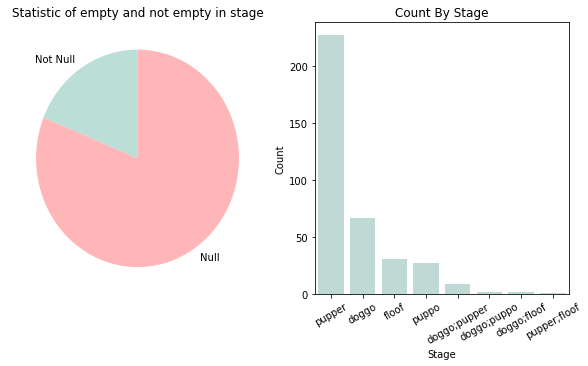

In [4]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
num_notna_stage = df_cleaned_twitter_archive_enhanced[df_cleaned_twitter_archive_enhanced["stage"].notna()]["stage"].count()
num_na_stage = df_cleaned_twitter_archive_enhanced.shape[0] - num_notna_stage
plt.pie([num_notna_stage, num_na_stage], startangle=90, labels=["Not Null", "Null"], colors=[color_board[0], color_board[1]])
plt.title(u"Statistic of empty and not empty in stage")

plt.subplot(1,2,2)
group_by_stage = df_cleaned_twitter_archive_enhanced.groupby("stage")
sns.countplot(data = df_cleaned_twitter_archive_enhanced, x = "stage",\
              color = color_board[0], \
              order =group_by_stage["tweet_id"].count().sort_values(ascending=False).index)

plt.title("Count By Stage")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.xticks(rotation = 30);

### 可视化2:研究狗狗的评分分布
- 狗狗的评分大多数位于1.0到1.3之间，1.2的评分最多，其次是1.0和1.1
- 不同地位的狗狗的评分均值相差不大。

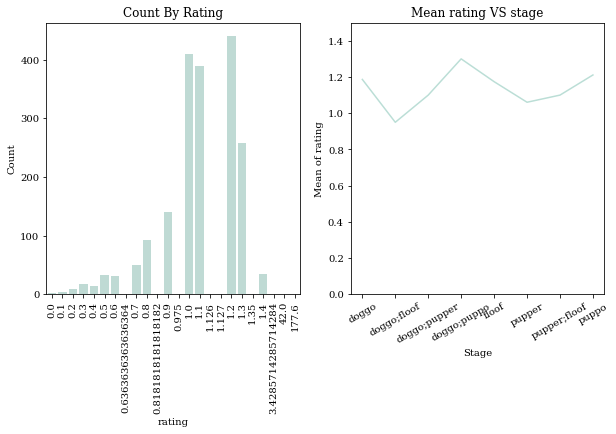

In [574]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ax = sns.countplot(data= df_cleaned_twitter_archive_enhanced, x = "rating", color=color_board[0])
plt.xticks(rotation = 90)
plt.xlabel("rating")
plt.ylabel("Count")
plt.title("Count By Rating")

plt.subplot(1,2,2)
df_stage_rating = df_cleaned_twitter_archive_enhanced.groupby("stage")["rating", "stage"].mean()
plt.plot(df_stage_rating, color = color_board[0])
plt.ylim((0, 1.5))
plt.xticks(rotation = 30)
plt.xlabel("Stage")
plt.ylabel("Mean of rating")
plt.title("Mean rating VS stage");

### 可视化3：用户访问设备
几乎所有的用户都喜欢用Iphone访问该网站。

Text(0.5,1,'Source By Rating')

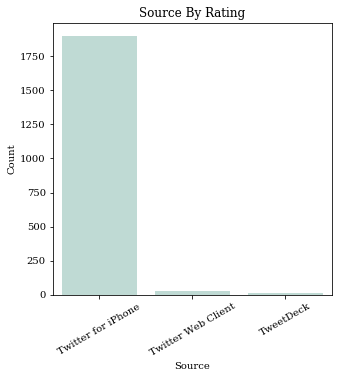

In [575]:
fig = plt.figure(figsize=(5, 5))
ax = sns.countplot(data= df_cleaned_twitter_archive_enhanced, x = "source", color=color_board[0])
plt.xticks(rotation = 30)
plt.xlabel("Source")
plt.ylabel("Count")
plt.title("Source By Rating")

### 可视化4： 用户最爱给自己的狗狗取的名字前20

In [5]:
group_name_20 = df_cleaned_twitter_archive_enhanced.groupby("name")["tweet_id"].count().sort_values(ascending=False)[1:20]
group_name_20 = group_name_20.reset_index()

In [6]:
group_name_20

,name,tweet_id
0,Lucy,10
1,Cooper,10
2,Oliver,10
3,Tucker,9
4,Penny,9
5,Sadie,8
6,Winston,8
7,Toby,7
8,Daisy,7
9,Lola,7


### 可视化5：转发数和喜爱数
- 不同的tweet_id用户喜爱数和转发数相差很大
- 狗狗的地位数据doggo;puppo用户最喜欢且最爱转发
- 用户的评分和转发和喜爱数没有关系。

- 不同的tweet_id用户喜爱数和转发数相差很大

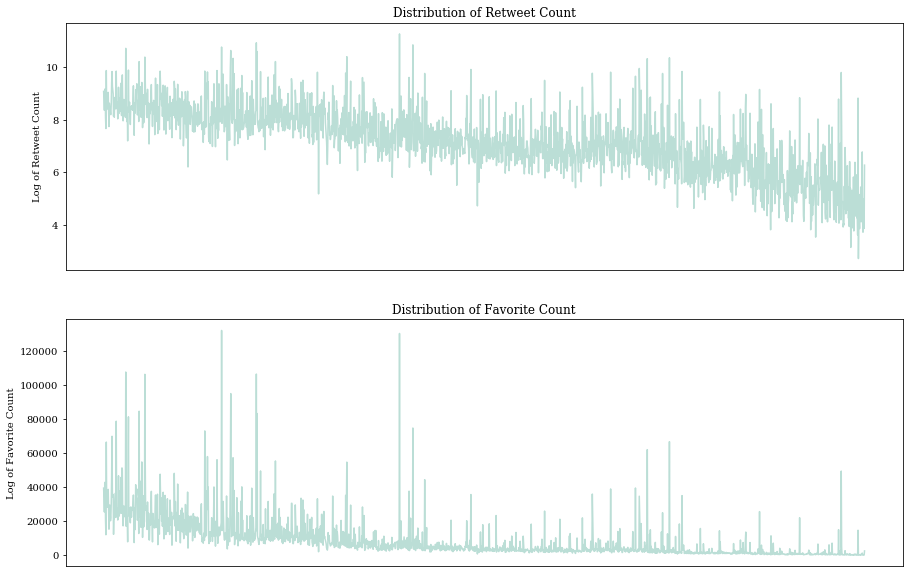

In [588]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
df_cleaned_twitter_archive_enhanced["retweet_count_log"] = np.log(df_cleaned_twitter_archive_enhanced["retweet_count"])
ax = plt.plot(df_cleaned_twitter_archive_enhanced["retweet_count_log"], color = color_board[0])
plt.xticks([]);
plt.ylabel("Log of Retweet Count")
plt.title("Distribution of Retweet Count");

plt.subplot(2,1,2)
df_cleaned_twitter_archive_enhanced["favorite_count_log"] = df_cleaned_twitter_archive_enhanced["favorite_count"]
plt.plot(df_cleaned_twitter_archive_enhanced["favorite_count_log"], color = color_board[0])
plt.xticks([]);
plt.ylabel("Log of Favorite Count")
plt.title("Distribution of Favorite Count");

- 狗狗的地位数据doggo;puppo用户最喜欢且最爱转发

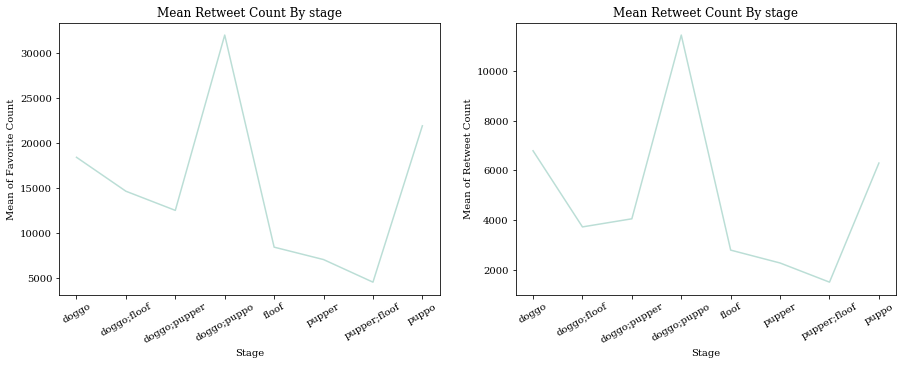

In [600]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(df_cleaned_twitter_archive_enhanced.groupby("stage")['stage', 'favorite_count'].mean(), color = color_board[0])
plt.xticks(rotation = 30)
plt.xlabel("Stage")
plt.ylabel("Mean of Favorite Count")
plt.title("Mean Retweet Count By stage")

plt.subplot(1,2,2)
plt.plot(df_cleaned_twitter_archive_enhanced.groupby("stage")['stage', 'retweet_count'].mean(), color = color_board[0])
plt.xticks(rotation = 30)
plt.xlabel("Stage")
plt.ylabel("Mean of Retweet Count")
plt.title("Mean Retweet Count By stage");

- 用户的评分和转发和喜爱数没有关系。

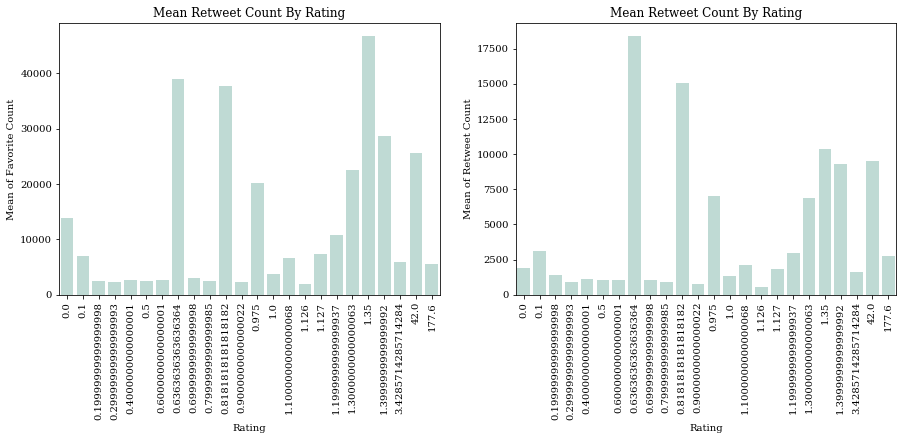

In [622]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
df_by_rating = df_cleaned_twitter_archive_enhanced.groupby("rating")['rating', 'favorite_count', 'retweet_count'].mean()
sns.barplot(df_by_rating["rating"], df_by_rating["favorite_count"], color = color_board[0])
plt.xticks(rotation = 90)
plt.xlabel("Rating")
plt.ylabel("Mean of Favorite Count")
plt.title("Mean Retweet Count By Rating")

plt.subplot(1,2,2)
sns.barplot(df_by_rating["rating"], df_by_rating["retweet_count"], color = color_board[0])
plt.xticks(rotation = 90)
plt.xlabel("Rating")
plt.ylabel("Mean of Retweet Count")
plt.title("Mean Retweet Count By Rating");

## 结论

- 大部分狗没有进行明确的分级，只有少部分有分级，其中有明确分级的狗狗中，pupper级别最多，doggo级别次之，再其次是floof.
- 狗狗的评分大多数位于1.0到1.3之间，1.2的评分最多，其次是1.0和1.1，不同地位的狗狗的评分均值相差不大。
- 几乎所有的用户都喜欢用Iphone访问该网站。
- 用户最常用的狗狗名称的前5分别是Lucy、Cooper、Tucker、Penny、Sadie。
- 不同的tweet_id用户喜爱数和转发数相差很大，其中用户最喜欢且最爱转发地位为doggo;puppo的tweet。
- 用户的评分和转发和喜爱数没有关系。

## 限制条件

- 已有的数据中大部分的狗狗没有地位相关的数据，这对于地位相关的分析可能存在偏差。